In [1]:
import pandas as pd
import numpy as np
import json
import re
import os
import chardet
from io import BytesIO
import spacy
from spacy_langdetect import LanguageDetector
import matplotlib.pyplot as plt
%matplotlib inline

# --------- Pandas Settings ---------- #
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_colwidth', -1)

# --------- Load Spacy Model --------- #
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe(LanguageDetector(), name='language_detector', last=True)

## Load memegenerator.csv to pandas dataframe

In [2]:
DATA_DIR = '../data'
FILE_NAME = 'memegenerator-dataset/memegenerator.csv'
FILE_PATH = os.path.join(DATA_DIR, FILE_NAME)
SAVE_FILE_PATH = os.path.join(DATA_DIR, 'cleaned_memegenerator.json')

# Check csv encoding
rawdata = open(FILE_PATH, 'rb').read()
result = chardet.detect(rawdata)
charenc = result['encoding']
charenc

'UTF-16'

In [3]:
# Convert csv to dataframe
with open(FILE_PATH,'rb') as f:
    df = pd.read_csv(BytesIO(f.read().decode('UTF-16').encode('UTF-8')), sep='\t+')
    
df.head()

/Users/nickburkhalter/.local/share/virtualenvs/memefly-de-5mU2nOSl/lib/python3.7/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


,Meme ID,Archived URL,Base Meme Name,Meme Page URL,MD5 Hash,File Size (In Bytes),Alternate Text,Display Name,Upper Text,Lower Text
0,10509464,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/10509464.jpg,Spiderman Approves,http://memegenerator.net/instance/10509464,91eee1453f2b66b4b0d662476bf630d8,87868,seems legit,Spiderman Approves,seems,legit
1,12285257,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/12285257.jpg,Alright Then Business Kid,http://memegenerator.net/instance/12285257,96a3aa60c0f3a5ffb027e8977f23b2cc,110242,Fret not I stayed at a Holiday Inn Express last night,Alright Then Business Kid,Fret not,I stayed at a Holiday Inn Express last night
2,20612245,http://webarchive.loc.gov/all/0/https://cdn.meme.am/instances/20612245.jpg,Archer,http://memegenerator.net/instance/20612245,1b84704851704a2dc366768a2210d659,125963,"""hello airplanes? yeah, this is blimps. Yeah, you win.""",Archer,"""hello airplanes? yeah, this is blimps.""","""Yeah, you win."""
3,20614628,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/20614628.jpg,Futurama Fry,http://webarchive.loc.gov/all/0/http://memegenerator.net/instance/20614628,448f5d4a15f5c90ce4d64c75013c8e9a,161623,LEGS IN COVER. TOO HOT. LEGS OUT OF COVER. TOO cold. One leg out. Just right BUt Scared monster under the bed will eat me,Futurama Fry,LEGS IN COVER. TOO HOT. LEGS OUT OF COVER. TOO cold. One leg out. Just right,BUt Scared monster under the bed will eat me
4,24194267,http://webarchive.loc.gov/all/0/https://cdn.meme.am/instances/24194267.jpg,One Does Not Simply,http://memegenerator.net/instance/24194267,37feb180a0e7660e360ed94380b39f60,92866,one does not simply put toothpaste back in the tube,One Does Not Simply,one does not simply,put toothpaste back in the tube


In [4]:
# Simplifying df to show only columns of need
wanted_columns = ['Archived URL', 'Base Meme Name', 
                  'Alternate Text', 'Display Name', 
                  'Upper Text', 'Lower Text']
df = df[wanted_columns]
df.head()

,Archived URL,Base Meme Name,Alternate Text,Display Name,Upper Text,Lower Text
0,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/10509464.jpg,Spiderman Approves,seems legit,Spiderman Approves,seems,legit
1,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/12285257.jpg,Alright Then Business Kid,Fret not I stayed at a Holiday Inn Express last night,Alright Then Business Kid,Fret not,I stayed at a Holiday Inn Express last night
2,http://webarchive.loc.gov/all/0/https://cdn.meme.am/instances/20612245.jpg,Archer,"""hello airplanes? yeah, this is blimps. Yeah, you win.""",Archer,"""hello airplanes? yeah, this is blimps.""","""Yeah, you win."""
3,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/20614628.jpg,Futurama Fry,LEGS IN COVER. TOO HOT. LEGS OUT OF COVER. TOO cold. One leg out. Just right BUt Scared monster under the bed will eat me,Futurama Fry,LEGS IN COVER. TOO HOT. LEGS OUT OF COVER. TOO cold. One leg out. Just right,BUt Scared monster under the bed will eat me
4,http://webarchive.loc.gov/all/0/https://cdn.meme.am/instances/24194267.jpg,One Does Not Simply,one does not simply put toothpaste back in the tube,One Does Not Simply,one does not simply,put toothpaste back in the tube


In [5]:
# Lowercase column names & replace spaces with underscores
columns = list(df.columns)
columns = [x.lower() for x in columns]
columns = [x.replace(' ', '_') for x in columns]
df.columns = columns
df.head()

,archived_url,base_meme_name,alternate_text,display_name,upper_text,lower_text
0,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/10509464.jpg,Spiderman Approves,seems legit,Spiderman Approves,seems,legit
1,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/12285257.jpg,Alright Then Business Kid,Fret not I stayed at a Holiday Inn Express last night,Alright Then Business Kid,Fret not,I stayed at a Holiday Inn Express last night
2,http://webarchive.loc.gov/all/0/https://cdn.meme.am/instances/20612245.jpg,Archer,"""hello airplanes? yeah, this is blimps. Yeah, you win.""",Archer,"""hello airplanes? yeah, this is blimps.""","""Yeah, you win."""
3,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/20614628.jpg,Futurama Fry,LEGS IN COVER. TOO HOT. LEGS OUT OF COVER. TOO cold. One leg out. Just right BUt Scared monster under the bed will eat me,Futurama Fry,LEGS IN COVER. TOO HOT. LEGS OUT OF COVER. TOO cold. One leg out. Just right,BUt Scared monster under the bed will eat me
4,http://webarchive.loc.gov/all/0/https://cdn.meme.am/instances/24194267.jpg,One Does Not Simply,one does not simply put toothpaste back in the tube,One Does Not Simply,one does not simply,put toothpaste back in the tube


In [6]:
# Compare base_meme_name to display_name
print(df.shape)
df[df['base_meme_name'] != df['display_name']].shape

(57687, 6)


(5116, 6)

In [7]:
# Create function to clean the dataframe
def wrangling(df: pd.core.frame.DataFrame):
    df = df.copy()
    column_names = list(df.columns)
    pattern = r'^[.,\/#!$%\^&\*;:{}=\-_`~()+]{4,}'
    
    # Remove extra whitespace and lowercase everything
    for i in column_names:
        if i != 'archived_url':
            df[i] = df[i].str.lower().str.strip()
        
            # Get rid of pesky punctuations
            df = df[~df[i].str.contains(pat=pattern, regex=True, na=False)]
    
    return df

In [8]:
df = wrangling(df)
df.head()

,archived_url,base_meme_name,alternate_text,display_name,upper_text,lower_text
0,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/10509464.jpg,spiderman approves,seems legit,spiderman approves,seems,legit
1,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/12285257.jpg,alright then business kid,fret not i stayed at a holiday inn express last night,alright then business kid,fret not,i stayed at a holiday inn express last night
2,http://webarchive.loc.gov/all/0/https://cdn.meme.am/instances/20612245.jpg,archer,"""hello airplanes? yeah, this is blimps. yeah, you win.""",archer,"""hello airplanes? yeah, this is blimps.""","""yeah, you win."""
3,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/20614628.jpg,futurama fry,legs in cover. too hot. legs out of cover. too cold. one leg out. just right but scared monster under the bed will eat me,futurama fry,legs in cover. too hot. legs out of cover. too cold. one leg out. just right,but scared monster under the bed will eat me
4,http://webarchive.loc.gov/all/0/https://cdn.meme.am/instances/24194267.jpg,one does not simply,one does not simply put toothpaste back in the tube,one does not simply,one does not simply,put toothpaste back in the tube


In [9]:
df[df['upper_text'].isnull() == True]

,archived_url,base_meme_name,alternate_text,display_name,upper_text,lower_text
39507,http://webarchive.loc.gov/all/0/https://cdn.meme.am/instances/250x250/24432120.jpg,ancient alien guy,ancient alien guy,None,None,None
43566,http://webarchive.loc.gov/all/0/https://cdn.meme.am/instances/250x250/26757613.jpg,sassy black woman,sassy black woman,None,None,None


In [10]:
# Drop those 2 useless rows above
print(df.shape)
df = df.drop([39507, 43566])
df.shape

(57610, 6)


(57608, 6)

In [11]:
print(df.shape)
df[df['lower_text'].isnull() == True]

(57608, 6)


,archived_url,base_meme_name,alternate_text,display_name,upper_text,lower_text
549,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/10194113.jpg,me gusta,vale,me gusta,vale,None
761,http://webarchive.loc.gov/all/0/https://cdn.meme.am/instances/250x250/10207031.jpg,guffdead,guffdead,guf r.i.p.,did he drop any good loot?,None
1349,http://webarchive.loc.gov/all/0/https://cdn.meme.am/instances/250x250/10239080.jpg,time oblivious slowpoke,se suicido allende cabros,time oblivious slowpoke,se suicido allende cabros,None
5660,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/10565758.jpg,feel like a sir,feel like a sir,---,---,None
7547,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/10765981.jpg,i dont always,вы мне доверяете?,the most interesting man in the world,вы мне доверяете?,None
9699,http://webarchive.loc.gov/all/0/https://cdn.meme.am/instances/250x250/11068021.jpg,peter parker spider man,b,peter parker spider man,b,None
9848,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/11096127.jpg,foul bachelor frog,waht,foul bachelor frog,waht,None
12446,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/11617080.jpg,me gusta,me gusta,,-,None
12544,http://webarchive.loc.gov/all/0/https://cdn.meme.am/instances/250x250/11646734.jpg,confused jackie chan,?,confused jackie chan,?,None
12687,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/11674558.jpg,impossibru guy,not hirarious?,impossibru guy,not hirarious?,None


In [12]:
# Remove all null values
print(df.shape)
df = df.dropna(axis=0)
print(df.shape)
df.head()

(57608, 6)
(57491, 6)


,archived_url,base_meme_name,alternate_text,display_name,upper_text,lower_text
0,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/10509464.jpg,spiderman approves,seems legit,spiderman approves,seems,legit
1,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/12285257.jpg,alright then business kid,fret not i stayed at a holiday inn express last night,alright then business kid,fret not,i stayed at a holiday inn express last night
2,http://webarchive.loc.gov/all/0/https://cdn.meme.am/instances/20612245.jpg,archer,"""hello airplanes? yeah, this is blimps. yeah, you win.""",archer,"""hello airplanes? yeah, this is blimps.""","""yeah, you win."""
3,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/20614628.jpg,futurama fry,legs in cover. too hot. legs out of cover. too cold. one leg out. just right but scared monster under the bed will eat me,futurama fry,legs in cover. too hot. legs out of cover. too cold. one leg out. just right,but scared monster under the bed will eat me
4,http://webarchive.loc.gov/all/0/https://cdn.meme.am/instances/24194267.jpg,one does not simply,one does not simply put toothpaste back in the tube,one does not simply,one does not simply,put toothpaste back in the tube


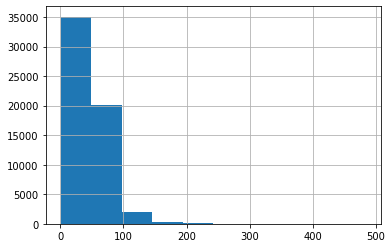

In [13]:
# Check distribution of meme text lengths
df['alternate_text'].str.len().hist()

## Set upper and lower bounds on the alternate_text

In [14]:
# Remove entries whose len is < 5 and > 150
df = df[(df['alternate_text'].str.len() > 4) & (df['alternate_text'].str.len() < 150)]
print(df.shape)
df.sample(10)

(56570, 6)


,archived_url,base_meme_name,alternate_text,display_name,upper_text,lower_text
42635,http://webarchive.loc.gov/all/0/https://cdn.meme.am/instances/250x250/26143335.jpg,overly obsessed girlfriend,ура дом 2,overly obsessed girlfriend,ура,дом-2
6748,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/10681467.jpg,challenge accepted 2,как зовут препода? ефим пинхусович! ты сдашь экзамен,challenge accepted 2,как зовут препода? - ефим пинхусович!,ты сдашь экзамен
4102,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/10428175.jpg,karate kyle,they picked me last for kickball i picked them first for ball kicks,karate kyle,they picked me last for kickball,i picked them first for ball-kicks
57553,http://webarchive.loc.gov/all/0/https://cdn.meme.am/instances/250x250/34961406.jpg,matias prats,tiburón muerde a un surfista en la entrepierna le costó un huevo salir del agua,matias prats,tiburón muerde a un surfista en la entrepierna,le costó un huevo salir del agua
51516,http://webarchive.loc.gov/all/0/https://cdn.meme.am/instances/250x250/31282086.jpg,bad luck brian,spends weeks downloading porn torrent all tram param,bad luck brian,spends weeks downloading porn torrent,all tram param
52979,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/32180453.jpg,please guy,valo ¿quieres? acompañarme al euro mañana?,please guy,valo ¿quieres?,acompañarme al euro mañana?
5192,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/10522372.jpg,foul bachelor frog,"""исключили из чампа похер) новый будет 7up, гаманёт на нем""",foul bachelor frog,исключили из чампа-похер),"""новый будет 7up, гаманёт на нем"""
23835,http://webarchive.loc.gov/all/0/https://cdn.meme.am/instances/250x250/16324529.jpg,cocaine bear,oza oza,cocaine bear,-,oza oza
56224,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/34138228.jpg,african kids dancing,"""лучше нет команды в мире, чем шахтёр на украине.""",african kids dancing,"""лучше нет команды в мире, """,чем шахтёр на украине.
11251,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/11364854.jpg,chemistry cat,¿que es chile con un doble enlace? un chileno,chemistry cat,¿que es chile con un doble enlace?,un chileno


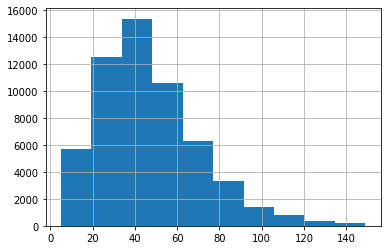

In [15]:
# Check distribution of meme text lengths AFTER bounds set
df['alternate_text'].str.len().hist();

In [16]:
df['base_meme_name'].value_counts()[df['base_meme_name'].value_counts()>99]

y u no                                                  759
futurama fry                                            661
insanity wolf                                           607
philosoraptor                                           520
success kid                                             509
the most interesting man in the world                   505
foul bachelor frog                                      467
willy wonka                                             466
socially awkward penguin                                444
advice yoda gives                                       418
forever alone                                           408
slowpoke                                                400
good guy greg                                           386
we got a badass over here                               379
joseph ducreux                                          373
courage wolf                                            372
butthurt dweller                        

In [17]:
# Remove laggard punctuations
import string

column_names = ['base_meme_name', 'alternate_text', 'display_name',
                'upper_text', 'lower_text']
for i in column_names:
    df[i] = df[i].str.translate(str.maketrans('', '', string.punctuation))

df.head()

,archived_url,base_meme_name,alternate_text,display_name,upper_text,lower_text
0,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/10509464.jpg,spiderman approves,seems legit,spiderman approves,seems,legit
1,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/12285257.jpg,alright then business kid,fret not i stayed at a holiday inn express last night,alright then business kid,fret not,i stayed at a holiday inn express last night
2,http://webarchive.loc.gov/all/0/https://cdn.meme.am/instances/20612245.jpg,archer,hello airplanes yeah this is blimps yeah you win,archer,hello airplanes yeah this is blimps,yeah you win
3,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/20614628.jpg,futurama fry,legs in cover too hot legs out of cover too cold one leg out just right but scared monster under the bed will eat me,futurama fry,legs in cover too hot legs out of cover too cold one leg out just right,but scared monster under the bed will eat me
4,http://webarchive.loc.gov/all/0/https://cdn.meme.am/instances/24194267.jpg,one does not simply,one does not simply put toothpaste back in the tube,one does not simply,one does not simply,put toothpaste back in the tube


In [18]:
# Observe samples where base_meme_name != display_name
print(df[df['base_meme_name'] != df['display_name']].shape)
df[df['base_meme_name'] != df['display_name']]

(3218, 6)


,archived_url,base_meme_name,alternate_text,display_name,upper_text,lower_text
449,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/10191346.jpg,andré villas,boas обменяю дрогбу на сычева,andré villasboas,обменяю дрогбу,на сычева
451,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/10191494.jpg,me e,сейчас выгоню из класса а меня не ебёт,meня не eбёт,name,а меня не ебёт
478,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/10192172.jpg,i dont always,me gusta ir a la oficina mirar mi mesa y volver a casa,the most interesting man in the world,me gusta ir a la oficina mirar mi mesa y volver a casa,
479,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/10192212.jpg,i dont always,no siempre voy a la oficina pero cuando voy solo miro mi mesa un rato,the most interesting man in the world,no siempre voy a la oficina,pero cuando voy solo miro mi mesa un rato
480,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/10192236.jpg,i dont always,me gusta ir a la oficina a mirar mi mesa un rato y luego volver a casa,the most interesting man in the world,me gusta ir a la oficina,a mirar mi mesa un rato y luego volver a casa
...,...,...,...,...,...,...
57592,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/34990735.jpg,bad luck brian meme,живу в челябинске пообещал девушке на 14 февраля достать звезду с неба,bad luck brian,живу в челябинске,пообещал девушке на 14 февраля достать звезду с неба
57607,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/35001658.jpg,bad luck brian meme,le regalan entradas para un concierto secreto tocan los wachiturros,bad luck brian,le regalan entradas para un concierto secreto,tocan los wachiturros
57621,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/35005225.jpg,willywonka,um tha a ki femen hajgare po ban me mu a,willy wonka,um tha a ki femen,hajgare po ban me mu a
57683,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/30905081.jpg,x x everywhere,black people black people everywhere,x x everywhere,black people,black people everywhere


In [19]:
df['base_meme_name'].nunique(), df['display_name'].nunique()

(1639, 1621)

## Get data from memefly database to create new dataframe

In [20]:
meme_name_json = ["advice-dog","advice-god","advice-peeta","annoying-facebook-girl","anti-joke-chicken","archer","art-student-owl","back-in-my-day","bad-advice-cat","bad-luck-brian","batman-slapping-robin","bear-grylls","buddy-the-elf","business-cat","butthurt-dweller","chemistry-cat","chill-out-lemur","chubby-bubbles-girl","chuck-norris","close-enough","conspiracy-keanu","contradictory-chris","courage-wolf","crazy-girlfriend-praying-mantis","cute-cat","depression-dog","disaster-girl","dont-you-squidward","dr-evil-laser","dumb-blonde","ermahgerd-berks","evil-cows","eye-of-sauron","felix-baumgartner","first-day-on-the-internet-kid","first-world-problems","forever-alone","foul-bachelorette-frog","foul-bachelor-frog","futurama-fry","gangnam-style","george-bush","good-guy-greg","grumpy-cat","han-solo","hedonism-bot","high-expectations-asian-father","hipster-ariel","hipster-kitty","how-tough-are-you","idiot-nerd-girl","ill-just-wait-here","insanity-wolf","i-see-dead-people","i-should-buy-a-boat-cat","i-will-find-you-and-kill-you","joe-biden","joseph-ducreux","kill-yourself-guy","kobe","lame-pun-coon","malicious-advice-mallard","matrix-morpheus","maury-lie-detector","mckayla-maroney-not-impressed","musically-oblivious-8th-grader","obama","one-does-not-simply","oprah-you-get-a","ordinary-muslim-man","original-stoner-dog","overly-manly-man","paranoid-parrot","patriotic-eagle","pepperidge-farm-remembers","philosoraptor","pickup-line-panda","priority-peter","professor-oak","rebecca-black","rich-raven","sad-x-all-the-y","scared-cat","scene-wolf","scumbag-boss","scumbag-steve","see-nobody-cares","sheltering-suburban-mom","slenderman","slowpoke","socially-awesome-awkward-penguin","socially-awesome-penguin","socially-awkward-penguin","south-park-craig","successful-black-man","success-kid","sudden-clarity-clarence","super-cool-ski-instructor","thats-a-paddlin","that-would-be-great","the-most-interesting-cat-in-the-world","the-most-interesting-man-in-the-world","unicorn-man","unpopular-opinion-puffin","vengeance-dad","we-will-rebuild","x-all-the-y","y-u-no"]
meme_name_json

['advice-dog',
 'advice-god',
 'advice-peeta',
 'annoying-facebook-girl',
 'anti-joke-chicken',
 'archer',
 'art-student-owl',
 'back-in-my-day',
 'bad-advice-cat',
 'bad-luck-brian',
 'batman-slapping-robin',
 'bear-grylls',
 'buddy-the-elf',
 'business-cat',
 'butthurt-dweller',
 'chemistry-cat',
 'chill-out-lemur',
 'chubby-bubbles-girl',
 'chuck-norris',
 'close-enough',
 'conspiracy-keanu',
 'contradictory-chris',
 'courage-wolf',
 'crazy-girlfriend-praying-mantis',
 'cute-cat',
 'depression-dog',
 'disaster-girl',
 'dont-you-squidward',
 'dr-evil-laser',
 'dumb-blonde',
 'ermahgerd-berks',
 'evil-cows',
 'eye-of-sauron',
 'felix-baumgartner',
 'first-day-on-the-internet-kid',
 'first-world-problems',
 'forever-alone',
 'foul-bachelorette-frog',
 'foul-bachelor-frog',
 'futurama-fry',
 'gangnam-style',
 'george-bush',
 'good-guy-greg',
 'grumpy-cat',
 'han-solo',
 'hedonism-bot',
 'high-expectations-asian-father',
 'hipster-ariel',
 'hipster-kitty',
 'how-tough-are-you',
 'idiot-n

In [21]:
meme_name_df = pd.Series(meme_name_json)
meme_name_df = meme_name_df.to_frame(name='meme_name')
meme_name_df.head()

,meme_name
0,advice-dog
1,advice-god
2,advice-peeta
3,annoying-facebook-girl
4,anti-joke-chicken


In [22]:
# Replace hyphens with spaces for merge
meme_name_df['meme_name'] = meme_name_df['meme_name'].str.replace('-', ' ')
meme_name_df.head()

,meme_name
0,advice dog
1,advice god
2,advice peeta
3,annoying facebook girl
4,anti joke chicken


## Merge meme_name_df and df, left on meme_name right on display_name

In [23]:
df = meme_name_df.merge(df, left_on='meme_name', right_on='display_name', how='outer')
df.sample(25)

,meme_name,archived_url,base_meme_name,alternate_text,display_name,upper_text,lower_text
35552,NaN,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/23425194.jpg,most interesting man,kein ausweis dabei zehntes plansch intus,most interesting man,kein ausweis dabei,zehntes plansch intus
26228,NaN,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/19278932.jpg,swagga stupid,le disen la capa de ozono cada vez tiene el oyo mas grande,,,
54660,NaN,http://webarchive.loc.gov/all/0/https://cdn.meme.am/instances/250x250/27366329.jpg,sith lord,bien gonz deja que los memes crezcan en ti,sith lord,bien gonz,deja que los memes crezcan en ti
32344,NaN,http://webarchive.loc.gov/all/0/https://cdn.meme.am/instances/250x250/17011971.jpg,amy winehouse,que quien es jose navarro,amy winehouse,que,quien es jose navarro
31130,NaN,http://webarchive.loc.gov/all/0/https://cdn.meme.am/instances/250x250/32654250.jpg,karate kyle,ciebie nie rusze ale twojego koleżke to rozjebie,karate kyle,ciebie nie rusze,ale twojego koleżke to rozjebie
40824,NaN,http://webarchive.loc.gov/all/0/https://cdn.meme.am/instances/250x250/25603064.jpg,koala cant believe it,se acabo la nutella,koala cant believe it,se acabo,la nutella
38943,NaN,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/32030963.jpg,mrtrololo,trololo dux rule,mrtrololo,trololo,dux rule
13156,y u no,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/18350332.jpg,y u no,i dont always create memes but when i do i use the wrong ones,y u no,i dont always create memes,but when i do i use the wrong ones
47671,NaN,http://webarchive.loc.gov/all/0/https://cdn.meme.am/instances/250x250/26584556.jpg,southpark bad time meme,usa la cabeza vota planilla roja,southpark bad time meme,usa la cabeza,vota planilla roja
24053,NaN,http://webarchive.loc.gov/all/0/https://cdn.meme.am/instances/250x250/13086847.jpg,rage fu,яка маршрутка з центру на левандівку httpwwwewayinuauacitieslvivroutes,rage fu,яка маршрутка з центру на левандівку,httpwwwewayinuauacitieslvivroutes


In [24]:
df[df['meme_name'].isnull() == True]

,meme_name,archived_url,base_meme_name,alternate_text,display_name,upper_text,lower_text
13296,NaN,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/10509464.jpg,spiderman approves,seems legit,spiderman approves,seems,legit
13297,NaN,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/10858431.jpg,spiderman approves,i care this much,spiderman approves,i care,this much
13298,NaN,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/25750974.jpg,spiderman approves,1010 would bang,spiderman approves,10oct,would bang
13299,NaN,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/29374192.jpg,spiderman approves,everyones out enjoying halloween and im just sitting here masturbating into some poor girls pumpkin socks,spiderman approves,everyones out enjoying halloween,and im just sitting here masturbating into some poor girls pumpkin socks
13300,NaN,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/32673511.jpg,spiderman approves,shat di fak aaap,spiderman approves,shat di,fak aaap
...,...,...,...,...,...,...,...
56596,NaN,http://webarchive.loc.gov/all/0/https://cdn.meme.am/instances/250x250/34937123.jpg,doodle bob,i carry you just like i carry this pencil,doodle bob,i carry you,just like i carry this pencil
56597,NaN,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/34971322.jpg,prisoner rapist,pratica racismo de brinks no fb crime inafiancavel,prisoner rapist,pratica racismo de brinks no fb,crime inafiancavel
56598,NaN,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/34998202.jpg,maconheiro da depre,chama a galera pra fumar um mas não leva maconha,maconheiro da depre,chama a galera pra fumar um,mas não leva maconha
56599,NaN,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/34998341.jpg,maconheiro da depre,chama a galera pra fumar uns mas não leva maconha,maconheiro da depre,chama a galera pra fumar uns,mas não leva maconha


## Check for meme name aliases in base_meme_name and display_name

In [25]:
"""
NOTE: Row 26238 has 'advice dog' in base_meme_name, but because the display_name cell
      was empty when the merge happened, the meme_name column shows NaN.
"""
df[(df['base_meme_name'].str.contains('advice')) & (df['base_meme_name'].str.contains('dog'))]

,meme_name,archived_url,base_meme_name,alternate_text,display_name,upper_text,lower_text
0,advice dog,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/10194497.jpg,advice dog,hate new facebook account settings deactivate account,advice dog,hate new facebook,account settings deactivate account
1,advice dog,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/10278657.jpg,advice dog,не вникай коси налево,advice dog,не вникай,коси налево
2,advice dog,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/10282166.jpg,advice dog,будь плохим парнем играй в лока,advice dog,будь плохим парнем,играй в лока
3,advice dog,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/10284423.jpg,advice dog,ставь прививку нюхай ватку,advice dog,ставь прививку,нюхай ватку
4,advice dog,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/10288362.jpg,advice dog,like girl in class sniff her butt when shes not looking,advice dog,like girl in class,sniff her butt when shes not looking
...,...,...,...,...,...,...,...
196,advice dog,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/33813288.jpg,advice dog,tranquilo mi popo tiene vitaminas por ke me hice en tu comida,advice dog,tranquilo mi popo tiene vitaminas,por ke me hice en tu comida
197,advice dog,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/34449976.jpg,advice dog,cuando hay que tomar una decisión difícil lanza una moneda porque cuando la moneda está en el aire de repente sabes lo que estás esperando,advice dog,cuando hay que tomar una decisión difícil lanza una moneda,porque cuando la moneda está en el aire de repente sabes lo que estás esperando
198,advice dog,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/34582436.jpg,advice dog,las rosas son grises las violetas son grises lol soy un perro,advice dog,las rosas son grises las violetas son grises,lol soy un perro
26238,NaN,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/19900940.jpg,advice dog,roses are grey violets are grey lol im a dog,,,


### Verifying whether our merge worked 100% correctly

There may be instances where the merge didn't happen even though
the meme name is correct. Since we merged meme_name_df with our 
original df, there may be some instances where the meme name in 
base_meme_name is actually correct.

In [26]:
# Create list of all meme names from memefly database
meme_names = list(df['meme_name'].unique())
meme_names = meme_names[:108]

name_sets = []
for i in range(len(meme_names)):
    split = meme_names[i].split()
    name_sets.append(split)

meme_names

['advice dog',
 'advice god',
 'advice peeta',
 'annoying facebook girl',
 'anti joke chicken',
 'archer',
 'art student owl',
 'back in my day',
 'bad advice cat',
 'bad luck brian',
 'batman slapping robin',
 'bear grylls',
 'buddy the elf',
 'business cat',
 'butthurt dweller',
 'chemistry cat',
 'chill out lemur',
 'chubby bubbles girl',
 'chuck norris',
 'close enough',
 'conspiracy keanu',
 'contradictory chris',
 'courage wolf',
 'crazy girlfriend praying mantis',
 'cute cat',
 'depression dog',
 'disaster girl',
 'dont you squidward',
 'dr evil laser',
 'dumb blonde',
 'ermahgerd berks',
 'evil cows',
 'eye of sauron',
 'felix baumgartner',
 'first day on the internet kid',
 'first world problems',
 'forever alone',
 'foul bachelorette frog',
 'foul bachelor frog',
 'futurama fry',
 'gangnam style',
 'george bush',
 'good guy greg',
 'grumpy cat',
 'han solo',
 'hedonism bot',
 'high expectations asian father',
 'hipster ariel',
 'hipster kitty',
 'how tough are you',
 'idiot n

In [27]:
"""
There may be instances where the merge didn't happen even though
the meme name is correct. Since we merged meme_name_df with our 
original df, there may be some instances where the meme name in 
base_meme_name is actually correct.
"""

# Create dataframe containing only entries whose meme_name is NaN
nan_meme_names = df[df['meme_name'].isnull() == True]

# Create sets of the meme_name column and base_meme_name column
# Get only unique values
# We can perform arithmetic operations on sets
nan_list = set(list(nan_meme_names['base_meme_name'].unique()))
meme_list = set(meme_names)

# Create list of meme names from base_meme_name that are actually in meme_name
in_list = [i for i in nan_list if i in meme_list]
in_list = sorted(in_list)
in_list  # 22 different instances of meme type that missed the merge

['advice dog',
 'annoying facebook girl',
 'archer',
 'bad luck brian',
 'bear grylls',
 'chuck norris',
 'conspiracy keanu',
 'dont you squidward',
 'futurama fry',
 'good guy greg',
 'grumpy cat',
 'hipster kitty',
 'insanity wolf',
 'matrix morpheus',
 'one does not simply',
 'philosoraptor',
 'slowpoke',
 'socially awkward penguin',
 'success kid',
 'sudden clarity clarence',
 'the most interesting man in the world',
 'y u no']

### Correct meme_name where the merge missed

We want to replace the NaN value in `meme_name` with one of the items from `in_list` if `base_meme_name` == one of the items in `in_list`

In [28]:
mask = (df['base_meme_name'].isin(in_list)) & (df['meme_name'].isnull() == True)
df['meme_name'] = np.where(mask, df['base_meme_name'], df['meme_name'])
    
df.loc[26148, 'meme_name']  # Was NaN prior to above code implementation

'y u no'

In [29]:
type(df.loc[55563, 'meme_name']) == float

True

In [30]:
df[(df['base_meme_name'].isin(in_list)) & (df['meme_name'].isnull() == True)]

,meme_name,archived_url,base_meme_name,alternate_text,display_name,upper_text,lower_text


In [31]:
name_sets

[['advice', 'dog'],
 ['advice', 'god'],
 ['advice', 'peeta'],
 ['annoying', 'facebook', 'girl'],
 ['anti', 'joke', 'chicken'],
 ['archer'],
 ['art', 'student', 'owl'],
 ['back', 'in', 'my', 'day'],
 ['bad', 'advice', 'cat'],
 ['bad', 'luck', 'brian'],
 ['batman', 'slapping', 'robin'],
 ['bear', 'grylls'],
 ['buddy', 'the', 'elf'],
 ['business', 'cat'],
 ['butthurt', 'dweller'],
 ['chemistry', 'cat'],
 ['chill', 'out', 'lemur'],
 ['chubby', 'bubbles', 'girl'],
 ['chuck', 'norris'],
 ['close', 'enough'],
 ['conspiracy', 'keanu'],
 ['contradictory', 'chris'],
 ['courage', 'wolf'],
 ['crazy', 'girlfriend', 'praying', 'mantis'],
 ['cute', 'cat'],
 ['depression', 'dog'],
 ['disaster', 'girl'],
 ['dont', 'you', 'squidward'],
 ['dr', 'evil', 'laser'],
 ['dumb', 'blonde'],
 ['ermahgerd', 'berks'],
 ['evil', 'cows'],
 ['eye', 'of', 'sauron'],
 ['felix', 'baumgartner'],
 ['first', 'day', 'on', 'the', 'internet', 'kid'],
 ['first', 'world', 'problems'],
 ['forever', 'alone'],
 ['foul', 'bacheloret

In [32]:
df[df['meme_name'].isnull() == True].shape

(43196, 7)

In [33]:
for name_list in name_sets:
    condition = ((df['base_meme_name'].str.contains('(' + ' ?'.join(name_list) + ')', 
                                                        regex=True, 
                                                        flags=re.IGNORECASE)) 
                    & (df['meme_name'].isnull()==True))
    
    df['meme_name'] = np.where(condition, ' '.join(name_list), df['meme_name'])

/Users/nickburkhalter/.local/share/virtualenvs/memefly-de-5mU2nOSl/lib/python3.7/site-packages/pandas/core/strings.py:1843: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [34]:
df[df['meme_name'].isnull() == True].shape

(41552, 7)

In [35]:
df[(df['base_meme_name'].str.contains(name_sets[9][0])) & (df['base_meme_name'].str.contains(name_sets[9][1])) & (df['meme_name'].isnull() == True)]

,meme_name,archived_url,base_meme_name,alternate_text,display_name,upper_text,lower_text
26243,NaN,http://webarchive.loc.gov/all/0/https://cdn.meme.am/instances/250x250/2143.jpg,bad luck donald trump,makes border on minecraft to keep out the mexicreepers,,,


In [36]:
df[df['meme_name'] == 'bad luck brian'].shape

(710, 7)

In [37]:
df[(df['base_meme_name'].str.contains('(' + ' ?'.join(name_sets[9]) + ')', regex=True, flags=re.IGNORECASE)) & (df['meme_name'].isnull()==True)]

,meme_name,archived_url,base_meme_name,alternate_text,display_name,upper_text,lower_text


In [38]:
condition = ((df['base_meme_name'].str.contains('(' + ' ?'.join(name_sets[9]) + ')', 
                                                        regex=True, 
                                                        flags=re.IGNORECASE)) 
                    & (df['meme_name'].isnull()==True))
df['meme_name'] = np.where(condition, ' '.join(name_sets[9]), df['meme_name'])

df[(df['base_meme_name'].str.contains('(' + ' ?'.join(name_sets[9]) + ')', regex=True, flags=re.IGNORECASE)) & (df['meme_name'].isnull()==True)]

,meme_name,archived_url,base_meme_name,alternate_text,display_name,upper_text,lower_text


In [39]:
df[df['meme_name'].isnull() == False].shape

(15049, 7)

In [40]:
df['meme_name'] = np.where(df['base_meme_name'] == 'dos equis', 
                           'the most interesting man in the world', 
                           df['meme_name'])

df[df['base_meme_name'] == 'dos equis']

,meme_name,archived_url,base_meme_name,alternate_text,display_name,upper_text,lower_text
37469,the most interesting man in the world,http://webarchive.loc.gov/all/0/https://cdn.meme.am/instances/250x250/11936491.jpg,dos equis,i dont always play skyrim but when i do i take an arrow to the knee,dos equis,i dont always play skyrim,but when i do i take an arrow to the knee
37470,the most interesting man in the world,http://webarchive.loc.gov/all/0/https://cdn.meme.am/instances/250x250/12667679.jpg,dos equis,i dont always drink milk but when i do i prefer dos boobies,dos equis,i dont always drink milk but when i do,i prefer dos boobies
37471,the most interesting man in the world,http://webarchive.loc.gov/all/0/https://cdn.meme.am/instances/250x250/15621740.jpg,dos equis,i dont always visit woodend but when i do i visit burkies,dos equis,i dont always visit woodend,but when i do i visit burkies
37472,the most interesting man in the world,http://webarchive.loc.gov/all/0/https://cdn.meme.am/instances/250x250/15948641.jpg,dos equis,i dont always watch every video i stumble across but if its in russian i always click play,dos equis,i dont always watch every video i stumble across,but if its in russian i always click play
37473,the most interesting man in the world,http://webarchive.loc.gov/all/0/https://cdn.meme.am/instances/250x250/16090183.jpg,dos equis,i dont always bet sports but when i do i fade lang,dos equis,i dont always bet sports,but when i do i fade lang
37474,the most interesting man in the world,http://webarchive.loc.gov/all/0/https://cdn.meme.am/instances/250x250/16403176.jpg,dos equis,i dont always trip and fall in my driveway but when i do i prefer to skip work for 3 months after,dos equis,i dont always trip and fall in my driveway,but when i do i prefer to skip work for 3 months after
37475,the most interesting man in the world,http://webarchive.loc.gov/all/0/https://cdn.meme.am/instances/250x250/20126950.jpg,dos equis,i dont always study but when i do its the night before,dos equis,i dont always study,but when i do its the night before
37476,the most interesting man in the world,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/21104625.jpg,dos equis,i dont always look at mitchells hair but when i do i call it orange,dos equis,i dont always look at mitchells hair,but when i do i call it orange
37477,the most interesting man in the world,http://webarchive.loc.gov/all/0/https://cdn.meme.am/instances/250x250/21341328.jpg,dos equis,i dont noramally fuck shit up on gb but when i do its with omgftwbbq,dos equis,i dont noramally fuck shit up on gb,but when i do its with omgftwbbq
37478,the most interesting man in the world,http://webarchive.loc.gov/all/0/https://cdn.meme.am/instances/250x250/21731810.jpg,dos equis,i dont always glue this to your yearbook but when i do its anoying stick long my friend,dos equis,i dont always glue this to your yearbook but when i do its anoying,stick long my friend


In [41]:
df['meme_name'] = np.where(df['base_meme_name'] == 'all the things', 
                           'x all the y', 
                           df['meme_name'])

df[df['base_meme_name'] == 'all the things']

,meme_name,archived_url,base_meme_name,alternate_text,display_name,upper_text,lower_text
26196,x all the y,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/15267757.jpg,all the things,destroy all the horcruxs,,,
38484,x all the y,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/12492315.jpg,all the things,ganar todos los segundos lugares,all the things,,ganar todos los segundos lugares
38485,x all the y,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/12499715.jpg,all the things,cagarte con todas las minas,all the things,cagarte con,todas las minas
38486,x all the y,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/12501951.jpg,all the things,que se pudran todos los maracos,all the things,que se pudran todos los maracos,
38487,x all the y,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/12515109.jpg,all the things,wear en la calle como si no ubiera mañana,all the things,wear en la calle como,si no ubiera mañana
...,...,...,...,...,...,...,...
38774,x all the y,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/33035252.jpg,all the things,que queremos,all the things,que queremos,
38775,x all the y,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/33380476.jpg,all the things,yo soy luz explota todo sino viene el médico de mierda,all the things,yo soy luz,explota todo sino viene el médico de mierda
38776,x all the y,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/33662981.jpg,all the things,solo las verdaderas directioners podemos dar like,all the things,solo las verdaderas directioners,podemos dar like
38777,x all the y,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/34407108.jpg,all the things,todos unanse a la pagina de arriba,all the things,todos unanse,a la pagina de arriba


In [42]:
df['meme_name'] = np.where(df['base_meme_name'] == 'sudden realization ralph', 
                           'sudden clarity clarence', 
                           df['meme_name'])

df[df['base_meme_name'] == 'sudden realization ralph']

,meme_name,archived_url,base_meme_name,alternate_text,display_name,upper_text,lower_text
46816,sudden clarity clarence,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/20447273.jpg,sudden realization ralph,tremendo pedo que solto esta conch,sudden realization ralph,tremendo pedo que solto esta conch,
46817,sudden clarity clarence,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/20537217.jpg,sudden realization ralph,i think ive learned more from the internet than i ever did in school,sudden realization ralph,i think ive learned more from the internet,than i ever did in school
46818,sudden clarity clarence,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/20892466.jpg,sudden realization ralph,el 80 y pico que llevan algunos usuarios en su nick es por el año de su nacimiento,sudden realization ralph,el 80 y pico que llevan algunos usuarios en su nick,es por el año de su nacimiento
46819,sudden clarity clarence,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/21678460.jpg,sudden realization ralph,buscar a los sumbis,sudden realization ralph,buscar a los sumbis,
46820,sudden clarity clarence,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/21679076.jpg,sudden realization ralph,no se me ocurrió que poner,sudden realization ralph,,no se me ocurrió que poner
46821,sudden clarity clarence,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/22716231.jpg,sudden realization ralph,оу май гат армин снял штаны,sudden realization ralph,оу май гат,армин снял штаны
46822,sudden clarity clarence,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/22747142.jpg,sudden realization ralph,wait a sec i know exactly where sesame street is,sudden realization ralph,wait a sec,i know exactly where sesame street is
46823,sudden clarity clarence,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/22799575.jpg,sudden realization ralph,el examen de topicos es un chiste,sudden realization ralph,el examen de topicos,es un chiste
46824,sudden clarity clarence,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/22844663.jpg,sudden realization ralph,mummies are egyptian zombies,sudden realization ralph,mummies,are egyptian zombies
46825,sudden clarity clarence,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/22850024.jpg,sudden realization ralph,lets dance bitch,sudden realization ralph,,lets dance bitch


In [43]:
df['meme_name'] = np.where(df['base_meme_name'] == 'shut up and take my money fry', 
                           'futurama fry', 
                           df['meme_name'])

df[df['base_meme_name'] =='shut up and take my money fry']

,meme_name,archived_url,base_meme_name,alternate_text,display_name,upper_text,lower_text
49929,futurama fry,http://webarchive.loc.gov/all/0/https://cdn.meme.am/instances/250x250/22084982.jpg,shut up and take my money fry,shout up and take the cd,shut up and take my money fry,shout up,and take the cd
49930,futurama fry,http://webarchive.loc.gov/all/0/https://cdn.meme.am/instances/250x250/22192212.jpg,shut up and take my money fry,dame 10 porfavor¡,shut up and take my money fry,dame 10,porfavor¡
49931,futurama fry,http://webarchive.loc.gov/all/0/https://cdn.meme.am/instances/250x250/22192410.jpg,shut up and take my money fry,yo pago por la cabeza de dj happy,shut up and take my money fry,yo pago por la cabeza,de dj happy
49932,futurama fry,http://webarchive.loc.gov/all/0/https://cdn.meme.am/instances/250x250/22196241.jpg,shut up and take my money fry,billete a millon por kuliarme ala vieja esa fuck,shut up and take my money fry,billete a millon,por kuliarme ala vieja esa fuck
49933,futurama fry,http://webarchive.loc.gov/all/0/https://cdn.meme.am/instances/250x250/22252003.jpg,shut up and take my money fry,gu jl,shut up and take my money fry,gu,jl
49934,futurama fry,http://webarchive.loc.gov/all/0/https://cdn.meme.am/instances/250x250/22308203.jpg,shut up and take my money fry,como que a fin de mes quiero mi entrada ahora titans of grind 2012,shut up and take my money fry,como que a fin de mes quiero mi entrada ahora,titans of grind 2012
49935,futurama fry,http://webarchive.loc.gov/all/0/https://cdn.meme.am/instances/250x250/22308262.jpg,shut up and take my money fry,quiero mi entrada ahora titans of grind fest 2012,shut up and take my money fry,quiero mi entrada ahora,titans of grind fest 2012
49936,futurama fry,http://webarchive.loc.gov/all/0/https://cdn.meme.am/instances/250x250/22308785.jpg,shut up and take my money fry,miguel angel y heber alli te acordas de esto me tienen que depositar,shut up and take my money fry,miguel angel y heber,alli te acordas de esto me tienen que depositar
49937,futurama fry,http://webarchive.loc.gov/all/0/https://cdn.meme.am/instances/250x250/22308869.jpg,shut up and take my money fry,miguel angel y heber recuerden de depositarme mis q5000,shut up and take my money fry,miguel angel y heber,recuerden de depositarme mis q5000
49938,futurama fry,http://webarchive.loc.gov/all/0/https://cdn.meme.am/instances/250x250/22309006.jpg,shut up and take my money fry,quiero mi paleta con esto alcanza,shut up and take my money fry,quiero mi paleta,con esto alcanza


In [44]:
df['meme_name'] = np.where(df['base_meme_name'] == 'batman bitchslap', 
                           'batman slapping robin', 
                           df['meme_name'])

df[df['base_meme_name'] == 'batman bitchslap']

,meme_name,archived_url,base_meme_name,alternate_text,display_name,upper_text,lower_text
48898,batman slapping robin,http://webarchive.loc.gov/all/0/https://cdn.meme.am/instances/250x250/21652580.jpg,batman bitchslap,yo si le voy le voy a mi shombr,batman bitchslap,yo si le voy le voy a mi,shombr
48899,batman slapping robin,http://webarchive.loc.gov/all/0/https://cdn.meme.am/instances/250x250/23694112.jpg,batman bitchslap,vito por que no puedo edit yo soy el editor,batman bitchslap,vito por que no puedo edit,yo soy el editor
48900,batman slapping robin,http://webarchive.loc.gov/all/0/https://cdn.meme.am/instances/250x250/24059603.jpg,batman bitchslap,no pense que fuera a estar tan lleno ho,batman bitchslap,no pense que fuera a estar tan lleno ho,
48901,batman slapping robin,http://webarchive.loc.gov/all/0/https://cdn.meme.am/instances/250x250/24059791.jpg,batman bitchslap,nooo gatubela es mia,batman bitchslap,nooo,gatubela es mia
48902,batman slapping robin,http://webarchive.loc.gov/all/0/https://cdn.meme.am/instances/250x250/24310630.jpg,batman bitchslap,like for bane comment for cat no,batman bitchslap,like for bane comment for cat,no
48903,batman slapping robin,http://webarchive.loc.gov/all/0/https://cdn.meme.am/instances/250x250/24494718.jpg,batman bitchslap,estudio musica para tocar banda no seas estupido para eso no se estudia,batman bitchslap,estudio musica para tocar banda,no seas estupido para eso no se estudia
48904,batman slapping robin,http://webarchive.loc.gov/all/0/https://cdn.meme.am/instances/250x250/24494815.jpg,batman bitchslap,pero te dije que si volvias a desafinar te ayudaria a no volverlo hacer,batman bitchslap,pero,te dije que si volvias a desafinar te ayudaria a no volverlo hacer
48905,batman slapping robin,http://webarchive.loc.gov/all/0/https://cdn.meme.am/instances/250x250/24513906.jpg,batman bitchslap,mientras tu me ignoras ya nos sabemos todos,batman bitchslap,mientras tu me ignoras,ya nos sabemos todos
48906,batman slapping robin,http://webarchive.loc.gov/all/0/https://cdn.meme.am/instances/250x250/24710186.jpg,batman bitchslap,ñaña ya te dije deja de salir con mis amigos,batman bitchslap,ñaña ya te dije,deja de salir con mis amigos
48907,batman slapping robin,http://webarchive.loc.gov/all/0/https://cdn.meme.am/instances/250x250/25157565.jpg,batman bitchslap,si no votas no te quej esto esta comprao,batman bitchslap,si no votas no te quej,esto esta comprao


In [45]:
df[df['meme_name'].isnull() == True].sample(100)

,meme_name,archived_url,base_meme_name,alternate_text,display_name,upper_text,lower_text
18873,NaN,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/29014045.jpg,success baby,cut 2 pages from my paper made a meme to celebrate,success baby,cut 2 pages from my paper,made a meme to celebrate
32424,NaN,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/10725602.jpg,es bakans,quien dijo que masturbarse era malo es bakan,es bakans,quien dijo que masturbarse era malo,es bakan
25932,NaN,http://webarchive.loc.gov/all/0/https://cdn.meme.am/instances/250x250/10397428.jpg,celestia,equestria needs urgent help spam random dragon to death,celestia,equestria needs urgent help,spam random dragon to death
26893,NaN,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/10856313.jpg,ancient aliens,i see your logic and reaplace with aliens,ancient aliens,i see your logic and reaplace with,aliens
13518,NaN,http://webarchive.loc.gov/all/0/https://cdn.meme.am/instances/250x250/10321719.jpg,yo dawg,гуф не не слышал,yo dawg,гуф,не не слышал
25853,NaN,http://webarchive.loc.gov/all/0/https://cdn.meme.am/instances/250x250/12090563.jpg,thespian peacock,cant go on date because you bought the into the woods vocal score girlfriend spends night singing it with you,thespian peacock,cant go on date because you bought the into the woods vocal score,girlfriend spends night singing it with you
50802,NaN,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/26443038.jpg,alguien puede pensar en los niños,alguien porfavor quiere pensar en el trabajo,alguien puede pensar en los niños,alguien porfavor,quiere pensar en el trabajo
27656,NaN,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/14471986.jpg,pawn stars,te ofresco 30 lukas y no estoy contento dandote 30,pawn stars,te ofresco 30 lukas,y no estoy contento dandote 30
13426,NaN,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/24297337.jpg,anxiety cat,estoooooy impresionado de tu bellesa,anxiety cat,estoooooy,impresionado de tu bellesa
38188,NaN,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/17866845.jpg,el cuy dice,si tener lag no quieres cerrar el porno debes,el cuy dice,si tener lag no quieres,cerrar el porno debes


In [46]:
meme_list

{'advice dog',
 'advice god',
 'advice peeta',
 'annoying facebook girl',
 'anti joke chicken',
 'archer',
 'art student owl',
 'back in my day',
 'bad advice cat',
 'bad luck brian',
 'batman slapping robin',
 'bear grylls',
 'buddy the elf',
 'business cat',
 'butthurt dweller',
 'chemistry cat',
 'chill out lemur',
 'chubby bubbles girl',
 'chuck norris',
 'close enough',
 'conspiracy keanu',
 'contradictory chris',
 'courage wolf',
 'crazy girlfriend praying mantis',
 'cute cat',
 'depression dog',
 'disaster girl',
 'dont you squidward',
 'dr evil laser',
 'dumb blonde',
 'ermahgerd berks',
 'evil cows',
 'eye of sauron',
 'felix baumgartner',
 'first day on the internet kid',
 'first world problems',
 'forever alone',
 'foul bachelor frog',
 'foul bachelorette frog',
 'futurama fry',
 'gangnam style',
 'george bush',
 'good guy greg',
 'grumpy cat',
 'han solo',
 'hedonism bot',
 'high expectations asian father',
 'hipster ariel',
 'hipster kitty',
 'how tough are you',
 'i see d

## Remove non-english text
A lot of the memes are not in English. These will in no way benefit our model, so they should be removed. We will use SpaCy to accomplish this

In [47]:
def lang_detect(text: str) -> str:
    """
    Takes a string and returns the language of its text.
    
    Arguments
    ------------------------------------------------------------------
    text (str).........................a string of text
    
    Returns
    -------------------------------------------------------------------
    doc._.language['language'] (str)...value entry of language key from 
                                       spacy-langdetect library
    """
    doc = nlp(text)
    return doc._.language['language']

### Replacing null values with a blank string
_**IMPORTANT:**_ Use `df[df['column_name'] == '']` to apply booleean masks going forward!

In [48]:
# Replace NaNs with empty strings
# Must be done in order to use spacy-langdetect
df = df.replace(np.nan, '', regex=True)
df.isnull().sum()

meme_name         0
archived_url      0
base_meme_name    0
alternate_text    0
display_name      0
upper_text        0
lower_text        0
dtype: int64

In [49]:
df['lang'] = df['alternate_text'].apply(lang_detect)
df.sample(100)

,meme_name,archived_url,base_meme_name,alternate_text,display_name,upper_text,lower_text,lang
47919,,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/24367276.jpg,stoner stanley,se me lengua la traba,stoner stanley,se me lengua,la traba,ca
51644,,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/22913038.jpg,proyodaadvice,поступки твои об обратном говорят,proyodaadvice,поступки твои,об обратном говорят,ru
47265,,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/25559483.jpg,really stoned guy,soy el aweonao del hijo,really stoned guy,soy el aweonao,del hijo,es
14279,,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/30187932.jpg,fat girl,mmma la parrilla como a mi me gusta,fat girl,mmma la parrilla,como a mi me gusta,it
37181,,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/16594963.jpg,samuel l jackson,say nossa one more time,samuel l jackson,say nossa,one more time,it
5951,futurama fry,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/17717754.jpg,futurama fry,not sure if actual download button or sketchy virus downloader,futurama fry,not sure if actual download button,or sketchy virus downloader,en
35318,,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/28584789.jpg,mario looking at castle,ya me escapé el tema es cómo llego a niceto club el 9 de noviembre para la fiesta nah,mario looking at castle,ya me escapé,el tema es cómo llego a niceto club el 9 de noviembre para la fiesta nah,es
32718,,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/10454413.jpg,steve jobs says,life did not flash before my eyes apple doesnt support flash,steve jobs says,life did not flash before my eyes,apple doesnt support flash,en
1565,bear grylls,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/12023004.jpg,bear grylls,мне придется съесть этого араба он полон протеина,bear grylls,мне придется съесть этого араба,он полон протеина,ru
56364,,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/32850493.jpg,yeah thatd be great,y entonces lucho cuando seas grande entenderas que a ellas solo les importa el cafecito,yeah thatd be great,y entonces lucho cuando seas grande,entenderas que a ellas solo les importa el cafecito,es


In [50]:
# Filter df to show only rows with english text
df = df[df['lang'] == 'en']
print(df.shape)
df.sample(10)

(16359, 8)


,meme_name,archived_url,base_meme_name,alternate_text,display_name,upper_text,lower_text,lang
29546,,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/30563214.jpg,winter is coming,brace yourself no wifi in grandmas house,winter is coming,brace yourself,no wifi in grandmas house,en
55537,,http://webarchive.loc.gov/all/0/https://cdn.meme.am/instances/250x250/31655177.jpg,not about the money joker,still a better use of money than dancing chetneys entry fee,not about the money joker,still a better use of money,than dancing chetneys entry fee,en
52203,,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/32549405.jpg,eating disorder owl,que mirai washo conchetumare,eating disorder owl,que mirai,washo conchetumare,en
33802,,http://webarchive.loc.gov/all/0/https://cdn.meme.am/instances/250x250/10627965.jpg,intense rage guy,¡¡¡¡¡¡¡¡why do they always send the poorbyob,intense rage guy,¡¡¡¡¡¡¡¡why do they always,send the poorbyob,en
36386,,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/11457109.jpg,mainstream,chaser john digs chicks acts all gay to be noticed,mainstreamchaser john,digs chicks,acts all gay to be noticed,en
36534,chuck norris,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/21558678.jpg,chuck norris advice,fear of spiders is called arachnophobia fear of me is called logic,chuck norris advice,fear of spiders is called arachnophobia,fear of me is called logic,en
2568,chuck norris,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/12250747.jpg,chuck norris,my dads name is chuck norris jr,chuck norris,my dads name,is chuck norris jr,en
14235,,http://webarchive.loc.gov/all/0/https://cdn.meme.am/instances/250x250/25423849.jpg,fat girl,thinks about dieting rewards self with chocolate bar,fat girl,thinks about dieting,rewards self with chocolate bar,en
39481,,http://webarchive.loc.gov/all/0/https://cdn.meme.am/instances/250x250/13774255.jpg,nokia 3310chuck2,falls in mount doom mount doom collapses on itself destroying all of mordor,nokia 3310chuck2,falls in mount doom,mount doom collapses on itself destroying all of mordor,en
26328,,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/27233556.jpg,diagnostic house,i have bad news your facebook likes didnt save the dying child,,,,en


In [51]:
# Convert empty string back to NaN
df = df.replace('', np.nan)
df.sample(10)

,meme_name,archived_url,base_meme_name,alternate_text,display_name,upper_text,lower_text,lang
1372,bad luck brian,http://webarchive.loc.gov/all/0/https://cdn.meme.am/instances/250x250/30448412.jpg,bad luck brian,buys a guitar has no strings the next day,bad luck brian,buys a guitar,has no strings the next day,en
3334,courage wolf,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/10962463.jpg,courage wolf,lost everything now you are free to do anything,courage wolf,lost everything,now you are free to do anything,en
13563,NaN,http://webarchive.loc.gov/all/0/https://cdn.meme.am/instances/250x250/10453539.jpg,yo dawg,my best friend mc grob,yo dawg,my best friend,mc grob,en
7046,hipster kitty,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/10222558.jpg,hipster kitty,i was watching snl before 1776,hipster kitty,i was watching snl,before 1776,en
22107,NaN,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/10938758.jpg,morbo,elevators do not work that way,morbo,elevators,do not work that way,en
40598,NaN,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/13535216.jpg,prepare yourself,prepare yourselves studies abroad are coming,prepare yourself,prepare yourselves,studies abroad are coming,en
39517,NaN,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/13226100.jpg,william shakespeare,to dick around or to not dick around that is the question another question what would dave do,william shakespeare,to dick around or to not dick around that is the question another question what would dave do,NaN,en
34312,NaN,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/35005691.jpg,irans president,makes plans for 7 shows up at 9,irans president,makes plans for 7,shows up at 9,en
23250,NaN,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/14613282.jpg,awesome smiley,was a meme before it was cool,awesome smiley,was a meme,before it was cool,en
53582,NaN,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/33402901.jpg,spoderman,we definitely have a hardcore following phill anselmo,spoderman,we definitely have a hardcore following phill anselmo,NaN,en


### Drop rows with NaN value in `meme_name`

In [52]:
df = df.dropna(axis=0)
print(df.shape)
df.sample(20)

(4551, 8)


,meme_name,archived_url,base_meme_name,alternate_text,display_name,upper_text,lower_text,lang
11336,successful black man,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/18126528.jpg,successful black man,i hate picking cotton trousers to match my mink coat,successful black man,i hate picking cotton,trousers to match my mink coat,en
2784,chuck norris,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/26194503.jpg,chuck norris,i won the world series of poker using pokemon cards,chuck norris,i won the world series of poker,using pokemon cards,en
3289,courage wolf,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/10617657.jpg,courage wolf,go to hell bring air conditioner,courage wolf,go to hell,bring air conditioner,en
1365,bad luck brian,http://webarchive.loc.gov/all/0/https://cdn.meme.am/instances/250x250/30235019.jpg,bad luck brian,aced the application forgot to submit it,bad luck brian,aced the application,forgot to submit it,en
1273,bad luck brian,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/26340725.jpg,badluckbrian,tries to silent fart in class shits,bad luck brian,tries to silent fart in class,shits,en
12314,the most interesting man in the world,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/18841319.jpg,the most interesting man in the world,i don´t always hashtag words but when i do they become tt,the most interesting man in the world,i don´t always hashtag words,but when i do they become tt,en
6335,good guy greg,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/11421278.jpg,good guy greg,has sex with you stays to cuddle after,good guy greg,has sex with you,stays to cuddle after,en
10147,scumbag steve,http://webarchive.loc.gov/all/0/https://cdn.meme.am/instances/250x250/33502039.jpg,scumbag steve,releases broken sdk bitches about broken sdks on twitter,scumbag steve,releases broken sdk,bitches about broken sdks on twitter,en
12351,the most interesting man in the world,http://webarchive.loc.gov/all/0/https://cdn.meme.am/instances/250x250/21241607.jpg,the most interesting man in the world,i dont always break rules but when i do i destroy earth,the most interesting man in the world,i dont always break rules,but when i do i destroy earth,en
55376,obama,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/29912992.jpg,obama laughing,so i told em it was all because of a youtube video,obama laughing,so i told em,it was all because of a youtube video,en


### Group all texts by `meme_name`

In [53]:
df = df[['meme_name', 'archived_url', 'alternate_text',
        'upper_text', 'lower_text']]
df.head()

,meme_name,archived_url,alternate_text,upper_text,lower_text
0,advice dog,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/10194497.jpg,hate new facebook account settings deactivate account,hate new facebook,account settings deactivate account
4,advice dog,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/10288362.jpg,like girl in class sniff her butt when shes not looking,like girl in class,sniff her butt when shes not looking
25,advice dog,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/10881617.jpg,its simple we kill the batman,its simple,we kill the batman
35,advice dog,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/11359140.jpg,then lick my hairy balls,then lick my,hairy balls
38,advice dog,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/11393710.jpg,internet explorer is the best browser to download another browser,internet explorer,is the best browser to download another browser


In [54]:
# Create new column that contains a dictionary
# Key = upper_text
# Value = lower_text

df['text_parser'] = df[['upper_text', 'lower_text']].to_dict(orient='records')
df.sample(10)

,meme_name,archived_url,alternate_text,upper_text,lower_text,text_parser
6836,high expectations asian father,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/11052006.jpg,instead of buy video game y u no make video game,instead of buy video game,y u no make video game,"{'upper_text': 'instead of buy video game', 'lower_text': 'y u no make video game'}"
2808,chuck norris,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/34674988.jpg,i acted in star wars as the force,i acted in star wars,as the force,"{'upper_text': 'i acted in star wars', 'lower_text': 'as the force'}"
3503,courage wolf,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/28808242.jpg,expectations of ea sports nhl video games to be great since 1994 nhl94 is still the best ever since,expectations of ea sports nhl video games to be great since 1994,nhl94 is still the best ever since,"{'upper_text': 'expectations of ea sports nhl video games to be great since 1994', 'lower_text': 'nhl94 is still the best ever since'}"
11495,success kid,http://webarchive.loc.gov/all/0/https://cdn.meme.am/instances/250x250/10795328.jpg,cry get rewarded with boobs,cry,get rewarded with boobs,"{'upper_text': 'cry', 'lower_text': 'get rewarded with boobs'}"
4129,first world problems,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/15629814.jpg,i hate when my wallet is full and it hurts to sit,i hate when my wallet is full,and it hurts to sit,"{'upper_text': 'i hate when my wallet is full', 'lower_text': 'and it hurts to sit'}"
10383,slowpoke,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/12786260.jpg,hey guys i got an arrow on my knee,hey guys,i got an arrow on my knee,"{'upper_text': 'hey guys', 'lower_text': 'i got an arrow on my knee'}"
9694,philosoraptor,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/17659634.jpg,if i asked you to have sex with me would the answer to that question be the same as the answer to this question,if i asked you to have sex with me would the answer to that question,be the same as the answer to this question,"{'upper_text': 'if i asked you to have sex with me would the answer to that question', 'lower_text': 'be the same as the answer to this question'}"
3756,disaster girl,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/27483398.jpg,they turned off the tv so i turned on the stove,they turned off the tv,so i turned on the stove,"{'upper_text': 'they turned off the tv', 'lower_text': 'so i turned on the stove'}"
22729,forever alone,http://webarchive.loc.gov/all/0/https://cdn.meme.am/instances/250x250/13242520.jpg,refreshes the page every second to check if i got any likes,refreshes the page every second,to check if i got any likes,"{'upper_text': 'refreshes the page every second', 'lower_text': 'to check if i got any likes'}"
10290,slowpoke,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/10521914.jpg,did you hear that apple guy died rip isaac newton,did you hear that apple guy died,rip isaac newton,"{'upper_text': 'did you hear that apple guy died', 'lower_text': 'rip isaac newton'}"


In [55]:
grouped = df.groupby('meme_name')
alternate_txt_grouped = grouped['alternate_text'].apply(list).to_frame().reset_index()
parsed_txt_grouped = grouped['text_parser'].apply(list).to_frame().reset_index()
alternate_txt_grouped.head(1)

,meme_name,alternate_text
0,advice dog,"[hate new facebook account settings deactivate account, like girl in class sniff her butt when shes not looking, its simple we kill the batman, then lick my hairy balls, internet explorer is the best browser to download another browser, no clue bout op question berate rest of hand, get drunk trash your parents house, he who never looks down steps in my shit, its only racist if your white, when you have to make a hard decision flip a coin because when that coin is in the air you suddenly know what youre hoping for, cyclone the target focus now hes immune to heal, drink paint taste the rainbow, hitler wasnt such a bad guy after all he did kill hitler, hey i just licked you and this is crazy but im a puppy so pet me maybe, a doorbell rang on tv let me sing you the song of my people, gets unlimited food from owners eats own crap, apply feature get something, advice dog says destroying cats gets u to dog heaven]"


In [56]:
parsed_txt_grouped.head(1)

,meme_name,text_parser
0,advice dog,"[{'upper_text': 'hate new facebook', 'lower_text': 'account settings deactivate account'}, {'upper_text': 'like girl in class', 'lower_text': 'sniff her butt when shes not looking'}, {'upper_text': 'its simple', 'lower_text': 'we kill the batman'}, {'upper_text': 'then lick my', 'lower_text': 'hairy balls'}, {'upper_text': 'internet explorer', 'lower_text': 'is the best browser to download another browser'}, {'upper_text': 'no clue bout op question', 'lower_text': 'berate rest of hand'}, {'upper_text': 'get drunk', 'lower_text': 'trash your parents house'}, {'upper_text': 'he who never looks down', 'lower_text': 'steps in my shit'}, {'upper_text': 'its only racist', 'lower_text': 'if your white'}, {'upper_text': 'when you have to make a hard decision flip a coin', 'lower_text': 'because when that coin is in the air you suddenly know what youre hoping for'}, {'upper_text': 'cyclone the target focus', 'lower_text': 'now hes immune to heal'}, {'upper_text': 'drink paint', 'lower_text': 'taste the rainbow'}, {'upper_text': 'hitler wasnt such a bad guy', 'lower_text': 'after all he did kill hitler'}, {'upper_text': 'hey i just licked you and this is crazy but im a puppy', 'lower_text': 'so pet me maybe'}, {'upper_text': 'a doorbell rang on tv', 'lower_text': 'let me sing you the song of my people'}, {'upper_text': 'gets unlimited food from owners', 'lower_text': 'eats own crap'}, {'upper_text': 'apply feature', 'lower_text': 'get something'}, {'upper_text': 'advice dog says', 'lower_text': 'destroying cats gets u to dog heaven'}]"


In [57]:
merged = alternate_txt_grouped.merge(parsed_txt_grouped, on='meme_name')
merged.head(1)

,meme_name,alternate_text,text_parser
0,advice dog,"[hate new facebook account settings deactivate account, like girl in class sniff her butt when shes not looking, its simple we kill the batman, then lick my hairy balls, internet explorer is the best browser to download another browser, no clue bout op question berate rest of hand, get drunk trash your parents house, he who never looks down steps in my shit, its only racist if your white, when you have to make a hard decision flip a coin because when that coin is in the air you suddenly know what youre hoping for, cyclone the target focus now hes immune to heal, drink paint taste the rainbow, hitler wasnt such a bad guy after all he did kill hitler, hey i just licked you and this is crazy but im a puppy so pet me maybe, a doorbell rang on tv let me sing you the song of my people, gets unlimited food from owners eats own crap, apply feature get something, advice dog says destroying cats gets u to dog heaven]","[{'upper_text': 'hate new facebook', 'lower_text': 'account settings deactivate account'}, {'upper_text': 'like girl in class', 'lower_text': 'sniff her butt when shes not looking'}, {'upper_text': 'its simple', 'lower_text': 'we kill the batman'}, {'upper_text': 'then lick my', 'lower_text': 'hairy balls'}, {'upper_text': 'internet explorer', 'lower_text': 'is the best browser to download another browser'}, {'upper_text': 'no clue bout op question', 'lower_text': 'berate rest of hand'}, {'upper_text': 'get drunk', 'lower_text': 'trash your parents house'}, {'upper_text': 'he who never looks down', 'lower_text': 'steps in my shit'}, {'upper_text': 'its only racist', 'lower_text': 'if your white'}, {'upper_text': 'when you have to make a hard decision flip a coin', 'lower_text': 'because when that coin is in the air you suddenly know what youre hoping for'}, {'upper_text': 'cyclone the target focus', 'lower_text': 'now hes immune to heal'}, {'upper_text': 'drink paint', 'lower_text': 'taste the rainbow'}, {'upper_text': 'hitler wasnt such a bad guy', 'lower_text': 'after all he did kill hitler'}, {'upper_text': 'hey i just licked you and this is crazy but im a puppy', 'lower_text': 'so pet me maybe'}, {'upper_text': 'a doorbell rang on tv', 'lower_text': 'let me sing you the song of my people'}, {'upper_text': 'gets unlimited food from owners', 'lower_text': 'eats own crap'}, {'upper_text': 'apply feature', 'lower_text': 'get something'}, {'upper_text': 'advice dog says', 'lower_text': 'destroying cats gets u to dog heaven'}]"


In [59]:
# Get archived_url for each meme_name
de_dups = df.drop_duplicates(subset='meme_name', keep='first').drop(columns=['alternate_text', 
                                                                             'upper_text', 
                                                                             'lower_text',
                                                                             'text_parser'])

de_dups.head()

,meme_name,archived_url
0,advice dog,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/10194497.jpg
200,advice god,http://webarchive.loc.gov/all/0/https://cdn.meme.am/instances/250x250/10181785.jpg
250,advice peeta,http://webarchive.loc.gov/all/0/https://cdn.meme.am/instances/250x250/11878855.jpg
264,annoying facebook girl,http://webarchive.loc.gov/all/0/https://cdn.meme.am/instances/250x250/10194561.jpg
528,anti joke chicken,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/10238729.jpg


In [60]:
merged = de_dups.merge(merged, on='meme_name')
merged.head(1)

,meme_name,archived_url,alternate_text,text_parser
0,advice dog,http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/10194497.jpg,"[hate new facebook account settings deactivate account, like girl in class sniff her butt when shes not looking, its simple we kill the batman, then lick my hairy balls, internet explorer is the best browser to download another browser, no clue bout op question berate rest of hand, get drunk trash your parents house, he who never looks down steps in my shit, its only racist if your white, when you have to make a hard decision flip a coin because when that coin is in the air you suddenly know what youre hoping for, cyclone the target focus now hes immune to heal, drink paint taste the rainbow, hitler wasnt such a bad guy after all he did kill hitler, hey i just licked you and this is crazy but im a puppy so pet me maybe, a doorbell rang on tv let me sing you the song of my people, gets unlimited food from owners eats own crap, apply feature get something, advice dog says destroying cats gets u to dog heaven]","[{'upper_text': 'hate new facebook', 'lower_text': 'account settings deactivate account'}, {'upper_text': 'like girl in class', 'lower_text': 'sniff her butt when shes not looking'}, {'upper_text': 'its simple', 'lower_text': 'we kill the batman'}, {'upper_text': 'then lick my', 'lower_text': 'hairy balls'}, {'upper_text': 'internet explorer', 'lower_text': 'is the best browser to download another browser'}, {'upper_text': 'no clue bout op question', 'lower_text': 'berate rest of hand'}, {'upper_text': 'get drunk', 'lower_text': 'trash your parents house'}, {'upper_text': 'he who never looks down', 'lower_text': 'steps in my shit'}, {'upper_text': 'its only racist', 'lower_text': 'if your white'}, {'upper_text': 'when you have to make a hard decision flip a coin', 'lower_text': 'because when that coin is in the air you suddenly know what youre hoping for'}, {'upper_text': 'cyclone the target focus', 'lower_text': 'now hes immune to heal'}, {'upper_text': 'drink paint', 'lower_text': 'taste the rainbow'}, {'upper_text': 'hitler wasnt such a bad guy', 'lower_text': 'after all he did kill hitler'}, {'upper_text': 'hey i just licked you and this is crazy but im a puppy', 'lower_text': 'so pet me maybe'}, {'upper_text': 'a doorbell rang on tv', 'lower_text': 'let me sing you the song of my people'}, {'upper_text': 'gets unlimited food from owners', 'lower_text': 'eats own crap'}, {'upper_text': 'apply feature', 'lower_text': 'get something'}, {'upper_text': 'advice dog says', 'lower_text': 'destroying cats gets u to dog heaven'}]"


In [61]:
# Save to JSON
merged.to_json(SAVE_FILE_PATH, orient='records')